# Do onset phones predict the concreteness of English words?

### Sean Trott, Arturs Semenuks, Benjamin Bergen

Do the sounds in a word impact its meaning? Although the basic unit of meaning in language is typically taken to be the morpheme, there is some evidence for form-meaning systematicity at the sub-morphemic level, as in phonaesthemes (Bergen, 2004) and iconicity (Dingemanse et al, 2015; Blasi et al, 2016). Additionally, formal properties of words, such as their length, are known to predict dimensions of meaning such as *concreteness* (Reilly & Kean, 2007; Reilly et al, 2017). 

To date, however, there is no work that we know of correlating individual *phones* with variables such as concreteness.

Here, we ask whether the *onset* phone of a word predicts its concreteness, using the set of [Brysbaert norms](http://crr.ugent.be/archives/1330).

(Depends on [NLP Utilities package](https://github.com/seantrott/nlp_utilities)).

## Load and Merge Data

In [1]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sn

# Operations
import numpy as np
import pandas as pd 
import statsmodels.formula.api as sm
from tqdm import tqdm
import scipy.stats as ss

# Custom imports
from nlp_utilities.compling import CorpusUtilities
from src.utils import get_concreteness_for_word


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

In [3]:
# Set global variables
DATA_PATH = "data/raw/brysbaert_norms.csv"
CHARACTER_INDEX	= 0
# Get data
df = pd.read_csv(DATA_PATH)
df['Word'] = df['Word'].str.lower()
df['Concreteness'] = df['Conc.M']
print("Number of words left in dataset: {num}".format(num=len(df)))

# Drop duplicates
df = df.drop_duplicates(subset="Word")
print("Number of words left in dataset: {num}".format(num=len(df)))

# Load celex
df_celex = pd.read_csv("data/raw/celex_all.csv", sep = "\\")
df_celex = df_celex.drop_duplicates(subset='Word')
print("Number of words in CELEX: {num}".format(num=len(df_celex)))

# Merge together to get phonetic representations
df_merged = df_celex.merge(df, on="Word")
print("Number of words in both Brysbaert and CELEX: {num}".format(num=len(df_merged)))

Number of words left in dataset: 39954
Number of words left in dataset: 39954
Number of words in CELEX: 46133
Number of words in both Brysbaert and CELEX: 24379


In [4]:
# Drop duplicate phonetic representations (homophones)
df_merged = df_merged.drop_duplicates(subset = 'PhonDISC')
print("Number of words left: {num}".format(num=len(df_merged)))

Number of words left: 24059


In [5]:
df_merged.head(5)

,Word,CobLog,CompCnt,PhonDISC,Class,SylCnt,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX,Dom_Pos,Concreteness
0,a,4.36,1,1,ART,1,0,1.46,1.14,2,30,0.93,1041179,Article,1.46
1,aback,0.48,2,@b{k,ADV,2,0,1.65,1.07,4,27,0.85,15,Adverb,1.65
2,abacus,0.00,0,{b@k@s,N,3,0,4.52,1.12,2,29,0.93,12,Noun,4.52
3,abandon,0.30,1,@b{nd@n,N,3,0,2.54,1.45,1,27,0.96,413,Verb,2.54
4,abandoned,0.00,1,@b{nd@nd,A,3,0,2.52,1.27,0,29,1.00,678,Verb,2.52


## Analysis 1: Concreteness ~ Onset phone

First, we analyze **concreteness ~ onset_phone** for monosyllabic words only, adding as covariates several other variables known to predict concreteness:

- Word length (number of phones)
- Grammatical class  
- Word frequency  

We then compare the R^2 of a model with the real **onset_phone** labels to the distribution of R^2 values obtained by shuffling **onset_phone**, but keeping the other covariates stable.

In [6]:
df_merged = df_merged[df_merged['CompCnt']<=1]
print("Number of words left: {num}".format(num=len(df_merged)))

Number of words left: 9659


In [7]:
df_merged['onset'] = df_merged['PhonDISC'].apply(lambda x: x[0])

# FIXED: Get actual length, not length of column
df_merged['word_length'] = df_merged['PhonDISC'].apply(lambda x: len(x))

In [8]:
result = sm.ols(formula="Concreteness ~ onset + word_length + Class + CobLog", data=df_merged).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Concreteness   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     82.72
Date:                Sat, 18 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:20:11   Log-Likelihood:                -12171.
No. Observations:                9658   AIC:                         2.445e+04
Df Residuals:                    9605   BIC:                         2.483e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.2953      0.139     23.656      0.000       3.022       3.568
onset[T.$]       -0.2436      0.169     -1.439      0.150      -0.575       0.088
onset[T.1]       -0.0482      0.199     -0.242      0.809      -0.439       0.343
onset[T.2]       -0.0047      0.210     -0.023      0.982      -0.416       0.407
onset[T.3]       -0.6328      0.291     -2.177      0.030      -1.203      -0.063
onset[T.4]        0.7401      0.405      1.826      0.068      -0.055       1.535
onset[T.5]       -0.2654      0.173     -1.535      0.125      -0.604       0.073
onset[T.6]       -0.5377      0.212     -2.535      0.011      -0.953      -0.122
onset[T.7]       -0.7174      0.512     -1.402      0.161      -1.721       0.286
onset[T.8]       -0.3402      0.405     -0.839      0.401      -1.135       0.454
onset[T.@]       -0.4632      0.144     -3.214      0.001      -0.746      -0.181
onset[T.D]       -0.6662      0.266     -2.504      0.012      -1.188      -0.145
onset[T.E]       -0.2748      0.154     -1.790      0.074      -0.576       0.026
onset[T.I]       -0.4141      0.140     -2.956      0.003      -0.689      -0.140
onset[T.J]        0.2087      0.160      1.301      0.193      -0.106       0.523
onset[T.Q]       -0.1631      0.169     -0.965      0.334      -0.494       0.168
onset[T.S]        0.1475      0.152      0.969      0.333      -0.151       0.446
onset[T.T]       -0.2294      0.167     -1.373      0.170      -0.557       0.098
onset[T.U]       -1.6097      0.623     -2.582      0.010      -2.832      -0.388
onset[T.V]       -0.2331      0.171     -1.363      0.173      -0.568       0.102
onset[T.Z]       -1.0364      0.620     -1.673      0.094      -2.251       0.178
onset[T._]        0.0087      0.151      0.057      0.954      -0.288       0.305
onset[T.b]        0.1044      0.138      0.755      0.450      -0.167       0.376
onset[T.d]       -0.2568      0.139     -1.854      0.064      -0.528       0.015
onset[T.f]       -0.2099      0.139     -1.505      0.132      -0.483       0.063
onset[T.g]       -0.0091      0.142     -0.064      0.949      -0.288       0.270
onset[T.h]       -0.0737      0.141     -0.521      0.602      -0.351       0.204
onset[T.i]       -0.4863      0.226     -2.149      0.032      -0.930      -0.043
onset[T.j]       -0.1594      0.170     -0.936      0.349      -0.493       0.174
onset[T.k]        0.0513      0.137      0.376      0.707      -0.216       0.319
onset[T.l]       -0.0488      0.142     -0.343      0.732      -0.328       0.230
onset[T.m]       -0.0462      0.139     -0.333      0.739      -0.319       0.226
onset[T.n]       -0.2411      0.147     -1.640      0.101      -0.529       0.047
onset[T.p]       -0.0575      0.137     -0.419      0.675      -0.326       0.211
onset[T.q]        0.1073      0.621      0.173   

In [9]:
result.rsquared

0.30930198193501646

In [11]:
### Shuffling
shuffled_rsquares = []
true_rsquare = result.rsquared

NUM_SHUFFLES = 100

for shuffle in tqdm(range(NUM_SHUFFLES)):
    new_df = df_merged.copy()
    new_df['shuffled_onset'] = np.random.permutation(new_df['onset'])
    new_result = sm.ols(formula="Concreteness ~ shuffled_onset + word_length + Class + CobLog", data=new_df).fit()
    shuffled_rsquares.append(new_result.rsquared)

100%|██████████| 100/100 [00:13<00:00,  5.99it/s]


In [12]:
shuffled_rsquares_np = np.array(shuffled_rsquares)
print(np.mean(shuffled_rsquares_np))
print(np.std(shuffled_rsquares_np))

0.28830335379135846
0.0007009963777654497


Text(0.5, 1.0, 'Analysis 1: real R^2 vs. random shuffles')

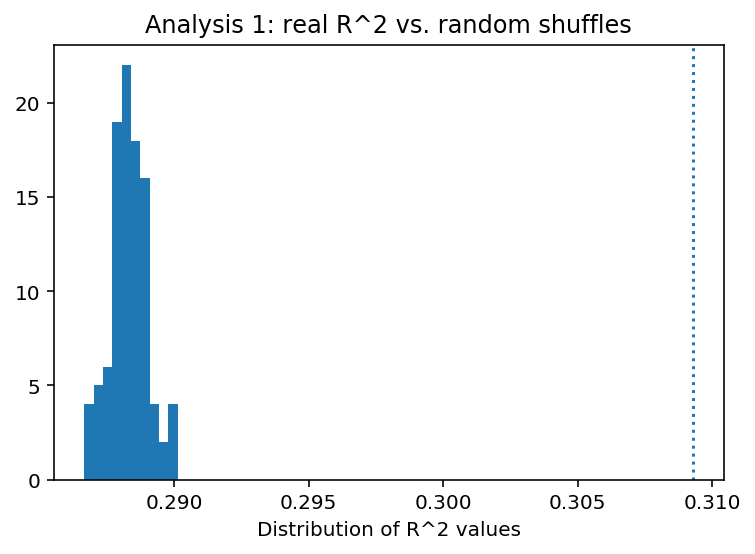

In [13]:
plt.hist(shuffled_rsquares)
plt.axvline(x=true_rsquare, linestyle="dotted")
plt.xlabel("Distribution of R^2 values")
plt.title("Analysis 1: real R^2 vs. random shuffles")

### Discussion and exploration

Based on these results, it seems like:

First, there is more structure in mappings between phonetic onsets and word concreteness than one would expect by chance, even controlling for grammatical class, word length, and word frequency.

Certain onsets exhibit particularly strong effects, such as: 
- **/@/** (the onset in *abandon* or *abide*) has a consistently *negative* impact on concreteness.
- **/I/** (the onset in *elastic*) has a consistently *negative* impact on concreteness.
- **/D/** (the onset in *they*) has a *negative* impact on concreteness.
- **/z/** (the onset in *zeal* or *zero*) has a marginally *negative* impact on concreteness.

### Supplementary analysis (1b): omitting /D/

Here, we ask whether the onset **/D/** is responsible for the variance that onset phones explain, since that covaries with function words (the, that, then, etc.). Controlling for grammatical class *should* take care of some of that variance, but this is another, more direct way to ask how much /D/ is responsible for the result above.

From the result, we see that the reduced dataset (omitting words beginning with /D/) still exhibits more structure in the relationship between onset phone and concreteness than randomly shuffled data.

In [14]:
df_merged_no_th = df_merged[df_merged['onset']!="D"]
print("Number of words left: {num}".format(num=len(df_merged_no_th)))

Number of words left: 9643


In [15]:
result = sm.ols(formula="Concreteness ~ onset + word_length + Class + CobLog", data=df_merged_no_th).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Concreteness   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     83.44
Date:                Sat, 18 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:21:44   Log-Likelihood:                -12155.
No. Observations:                9642   AIC:                         2.441e+04
Df Residuals:                    9590   BIC:                         2.479e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.2963      0.139     23.650      0.000       3.023       3.569
onset[T.$]       -0.2442      0.169     -1.442      0.149      -0.576       0.088
onset[T.1]       -0.0483      0.199     -0.242      0.809      -0.439       0.343
onset[T.2]       -0.0057      0.210     -0.027      0.978      -0.417       0.406
onset[T.3]       -0.6330      0.291     -2.176      0.030      -1.203      -0.063
onset[T.4]        0.7399      0.406      1.824      0.068      -0.055       1.535
onset[T.5]       -0.2655      0.173     -1.535      0.125      -0.605       0.074
onset[T.6]       -0.5377      0.212     -2.534      0.011      -0.954      -0.122
onset[T.7]       -0.7176      0.512     -1.401      0.161      -1.722       0.286
onset[T.8]       -0.3403      0.406     -0.839      0.401      -1.135       0.455
onset[T.@]       -0.4642      0.144     -3.220      0.001      -0.747      -0.182
onset[T.E]       -0.2747      0.154     -1.788      0.074      -0.576       0.026
onset[T.I]       -0.4137      0.140     -2.952      0.003      -0.688      -0.139
onset[T.J]        0.2086      0.161      1.299      0.194      -0.106       0.523
onset[T.Q]       -0.1649      0.169     -0.976      0.329      -0.496       0.166
onset[T.S]        0.1480      0.152      0.971      0.331      -0.151       0.447
onset[T.T]       -0.2301      0.167     -1.377      0.169      -0.558       0.097
onset[T.U]       -1.6098      0.624     -2.581      0.010      -2.832      -0.387
onset[T.V]       -0.2318      0.171     -1.355      0.175      -0.567       0.104
onset[T.Z]       -1.0365      0.620     -1.672      0.095      -2.252       0.179
onset[T._]        0.0086      0.151      0.057      0.955      -0.288       0.305
onset[T.b]        0.1041      0.138      0.752      0.452      -0.167       0.375
onset[T.d]       -0.2569      0.139     -1.854      0.064      -0.529       0.015
onset[T.f]       -0.2100      0.139     -1.505      0.132      -0.483       0.063
onset[T.g]       -0.0092      0.142     -0.065      0.948      -0.288       0.270
onset[T.h]       -0.0719      0.142     -0.508      0.611      -0.349       0.205
onset[T.i]       -0.4839      0.226     -2.137      0.033      -0.928      -0.040
onset[T.j]       -0.1578      0.170     -0.926      0.354      -0.492       0.176
onset[T.k]        0.0513      0.137      0.376      0.707      -0.217       0.319
onset[T.l]       -0.0489      0.142     -0.343      0.731      -0.328       0.230
onset[T.m]       -0.0456      0.139     -0.328      0.743      -0.318       0.227
onset[T.n]       -0.2427      0.147     -1.650      0.099      -0.531       0.046
onset[T.p]       -0.0576      0.137     -0.420      0.675      -0.327       0.211
onset[T.q]        0.0942      0.622      0.152      0.880      -1.124       1.313
onset[T.r]       -0.2854      0.139     -2.055   

In [16]:
### Shuffling
shuffled_rsquares = []
true_rsquare = result.rsquared

NUM_SHUFFLES = 100

for shuffle in tqdm(range(NUM_SHUFFLES)):
    new_df = df_merged_no_th.copy()
    new_df['shuffled_onset'] = np.random.permutation(new_df['onset'])
    new_result = sm.ols(formula="Concreteness ~ shuffled_onset + word_length + Class + CobLog", data=new_df).fit()
    shuffled_rsquares.append(new_result.rsquared)

100%|██████████| 100/100 [00:12<00:00,  9.04it/s]


In [17]:
shuffled_rsquares_np = np.array(shuffled_rsquares)
print(np.mean(shuffled_rsquares_np))
print(np.std(shuffled_rsquares_np))

0.2864870936464511
0.0006135023575607945


Text(0.5, 1.0, 'Supplementary analysis 1b: real R^2 vs. random shuffles')

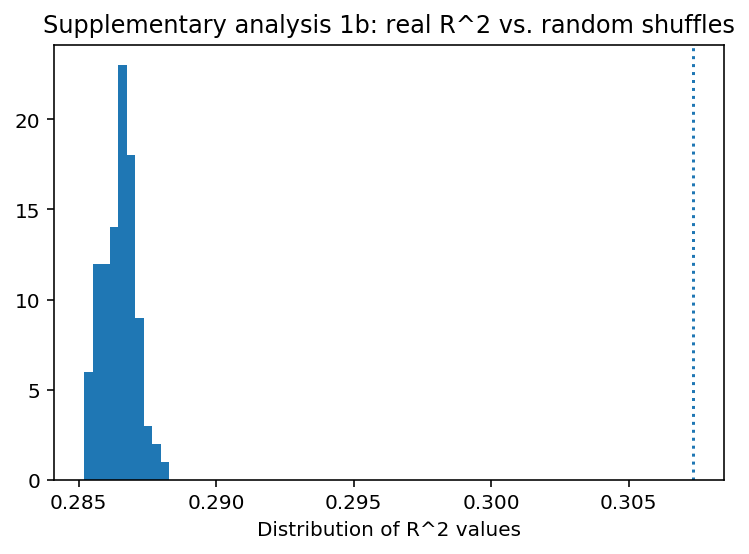

In [18]:
plt.hist(shuffled_rsquares)
plt.axvline(x=true_rsquare, linestyle="dotted")
plt.xlabel("Distribution of R^2 values")
plt.title("Supplementary analysis 1b: real R^2 vs. random shuffles")

## Analysis 2: Concreteness impact ~ onset

In our second analysis, we attempt to control for the rest of the word in a different way. We first identify all of the minimal sets in the lexicon differing only by the first sound, e.g., {hug, bug, ...}. For each set, we calculate the **mean concreteness**. We then define the **concreteness impact** of each onset phone differentiating the words in the set as the difference between the word beginning with that onset and the mean concreteness, e.g.,:

**Impact(h) = C(hug) - mean(C(hug, C(bug)...)**

We repeat this for each minimal set, such that any given onset phone has a distribution of associated **concreteness impact scores**. As above, we then regress impact against **onset phone**. 

### Get minimal pairs

In [19]:
df_merged['coda'] = df_merged['PhonDISC'].apply(lambda x: x[1:])

In [23]:
df_coda_means = df_merged.groupby('coda', as_index=False).mean()[['coda', 'Concreteness']]
df_coda_means['set_mean'] = df_coda_means['Concreteness']
df_coda_means = df_coda_means[['coda', 'set_mean']]
df_coda_means.head(5)

,coda,set_mean
0,,2.432500
1,#,3.590000
2,#D@R,3.256667
3,#J,3.690000
4,#R,4.064286


In [50]:
df_set_sizes = df_merged.groupby('coda', as_index=False).size()

In [25]:
df_joined = pd.merge(df_coda_means, df_merged, on = "coda")
len(df_joined)

9659

In [51]:
df_joined['set_size'] = df_joined['coda'].apply(lambda x: df_set_sizes[x])

In [73]:
df_joined = df_joined[df_joined['set_size']>1]
len(df_joined)

3260

In [74]:
df_joined['concreteness_impact'] = df_joined['Concreteness'] - df_joined['set_mean']

In [75]:
df_joined.to_csv("data/processed/brysbaert_concreteness_impacts.csv")

### Characterization

In [76]:
df_final = pd.read_csv("data/processed/brysbaert_concreteness_impacts.csv")

In [77]:
len(df_final)

3260

Text(0, 0.5, 'Count')

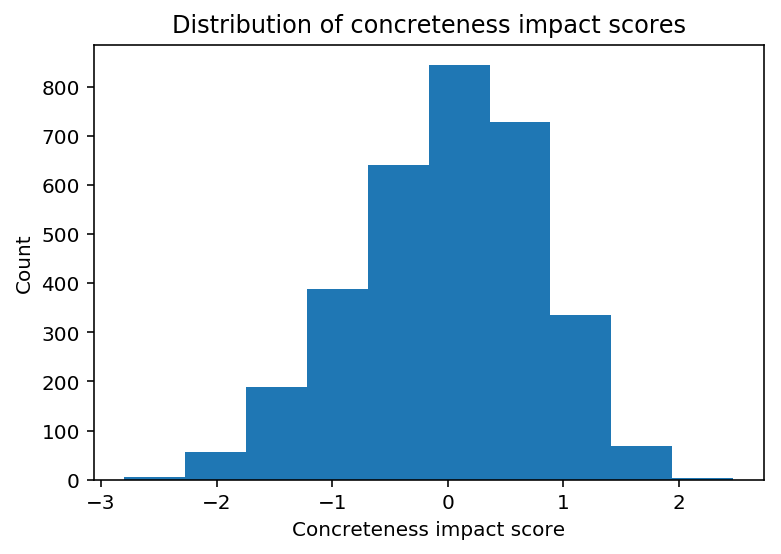

In [78]:
plt.hist(df_final['concreteness_impact'])
plt.title("Distribution of concreteness impact scores")
plt.xlabel("Concreteness impact score")
plt.ylabel("Count")

In [79]:
print("Skew: {s}".format(s=ss.stats.skew(df_final['concreteness_impact'])))
print("Mean: {m}".format(m=np.mean(df_final['concreteness_impact'])))
print("SD: {sd}".format(sd=np.std(df_final['concreteness_impact'])))

Skew: -0.29731302496110246
Mean: 1.975243418044757e-18
SD: 0.7886488449959401


### Characterization

Now, we do a similar analysis as before, but predicting the **impact** on concreteness.

In [80]:
result = sm.ols(formula="concreteness_impact ~ onset + set_mean + word_length + set_size", data=df_final).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     concreteness_impact   R-squared:                       0.043
Model:                             OLS   Adj. R-squared:                  0.031
Method:                  Least Squares   F-statistic:                     3.444
Date:                 Sat, 18 Jan 2020   Prob (F-statistic):           7.76e-13
Time:                         15:36:04   Log-Likelihood:                -3780.0
No. Observations:                 3260   AIC:                             7646.
Df Residuals:                     3217   BIC:                             7908.
Df Model:                           42                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2973      0.294      1.010      0.313      -0.280       0.874
onset[T.$]     -0.2779      0.336     -0.826      0.409      -0.938       0.382
onset[T.1]     -0.1991      0.354     -0.562      0.574      -0.894       0.496
onset[T.2]      0.2501      0.369      0.679      0.497      -0.473       0.973
onset[T.3]     -0.6107      0.388     -1.572      0.116      -1.372       0.151
onset[T.4]      0.1436      0.526      0.273      0.785      -0.887       1.175
onset[T.5]     -0.0780      0.325     -0.240      0.810      -0.715       0.559
onset[T.6]     -0.2524      0.476     -0.531      0.596      -1.185       0.680
onset[T.7]      0.2257      0.614      0.368      0.713      -0.978       1.430
onset[T.8]     -0.0906      0.614     -0.148      0.883      -1.295       1.113
onset[T.@]     -0.8110      0.316     -2.563      0.010      -1.431      -0.191
onset[T.D]     -1.6326      0.337     -4.842      0.000      -2.294      -0.971
onset[T.E]     -0.2092      0.361     -0.579      0.563      -0.918       0.499
onset[T.I]     -0.5775      0.322     -1.795      0.073      -1.208       0.053
onset[T.J]     -0.0559      0.292     -0.191      0.848      -0.629       0.517
onset[T.Q]     -0.0919      0.369     -0.249      0.803      -0.815       0.631
onset[T.S]      0.0008      0.287      0.003      0.998      -0.562       0.564
onset[T.T]     -0.3034      0.301     -1.009      0.313      -0.893       0.286
onset[T.V]     -0.0962      0.378     -0.254      0.799      -0.837       0.645
onset[T._]     -0.1213      0.291     -0.416      0.677      -0.692       0.450
onset[T.b]     -0.0348      0.280     -0.124      0.901      -0.583       0.514
onset[T.d]     -0.2060      0.282     -0.731      0.465      -0.759       0.347
onset[T.f]     -0.2433      0.281     -0.865      0.387      -0.794       0.308
onset[T.g]     -0.1276      0.283     -0.451      0.652      -0.682       0.427
onset[T.h]     -0.2108      0.282     -0.746      0.455      -0.765       0.343
onset[T.i]     -0.3373      0.355     -0.951      0.342      -1.032       0.358
onset[T.j]     -0.3356      0.307     -1.092      0.275      -0.938       0.267
onset[T.k]      0.0015      0.280      0.005      0.996      -0.548       0.551
onset[T.l]     -0.2123      0.283     -0.751      0.453      -0.766       0.342
onset[T.m]     -0.1974      0.282     -0.700      0.484      -0.750       0.355
onset[T.n]     -0.3320      0.288     -1.155      0.248      -0.896       0.232
onset[T.p]     -0.0655      0.280     -0.233      0.815      -0.615       0.484
onset[T.r]     -0.1661      0.282     -0.590      0.555      -0.718       0.386
onset[T.s]     -0.0926      0.281     -0.330      0.741      -0.643       0.458
onset[T.t]     -0.0644      0.282     -0.229      0.819      -0.617       0.488
onset[T.u]      0.6871      0.82

In [81]:
### Shuffling
shuffled_rsquares = []
true_rsquare = result.rsquared

NUM_SHUFFLES = 100

for shuffle in tqdm(range(NUM_SHUFFLES)):
    new_df = df_final.copy()
    new_df['shuffled_onset'] = np.random.permutation(new_df['onset'])
    new_result = sm.ols(formula="concreteness_impact ~ shuffled_onset + set_mean + word_length + set_size", data=new_df).fit()
    shuffled_rsquares.append(new_result.rsquared)

100%|██████████| 100/100 [00:04<00:00, 23.32it/s]


In [82]:
shuffled_rsquares_np = np.array(shuffled_rsquares)
print(np.mean(shuffled_rsquares_np))
print(np.std(shuffled_rsquares_np))

0.012082447227766106
0.0027755696077780925


Text(0.5, 1.0, 'Analysis 2: real R^2 vs. random shuffles')

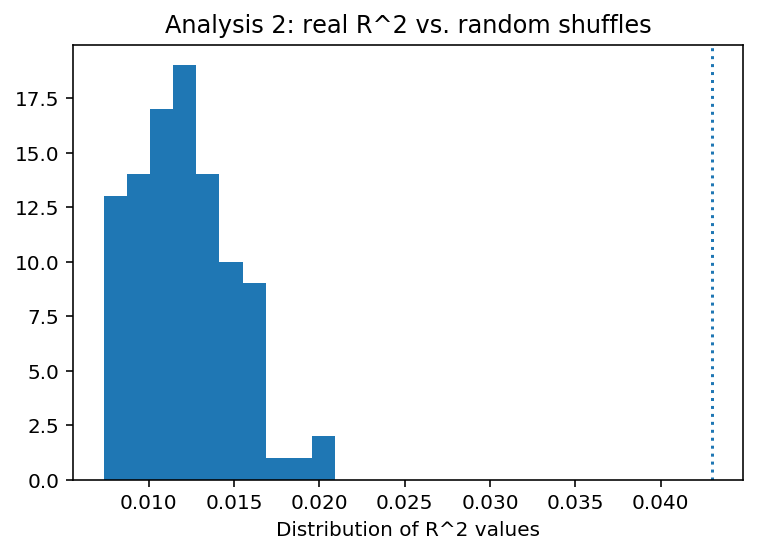

In [83]:
plt.hist(shuffled_rsquares)
plt.axvline(x=true_rsquare, linestyle="dotted")
plt.xlabel("Distribution of R^2 values")
plt.title("Analysis 2: real R^2 vs. random shuffles")

## Discussion and exploration

Based on these results, it seems like:

First, there is more structure in mappings between phonetic onsets and word concreteness than one would expect by chance, one we control for characteristics about the rest of the word.

Second, certain onsets exhibit particularly strong effects, such as: 
- **/D/** (the onset in *they*) has a consistently *negative* impact on concreteness.
- **/@/** (the onset in *abandon* or *abide*) has a consistently *negative* impact on concreteness.
- **/z/** (the onset in *zeal* or *zero*) has a *negative* impact on concreteness.

Other onsets show trends, but not strongly significant trends.

### Supplementary analysis (2b): omitting /D/

As above, we ask whether the onset **/D/** is responsible for the variance that onset phones explain, since that covaries with function words (the, that, then, etc.). 

Again, we see that the real dataset exhibits more structured relationships between *onset* and *concreteness impact* than the shuffled dataset, suggesting that this relationship is not due solely to the impact of cues like /D/ that covary with grammatical class.

In [84]:
df_final_no_th = df_final[df_final['onset']!="D"]
print("Number of words left: {num}".format(num=len(df_final_no_th)))

Number of words left: 3244


In [85]:
result = sm.ols(formula="concreteness_impact ~ onset + set_mean + word_length + set_size", data=df_final_no_th).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     concreteness_impact   R-squared:                       0.027
Model:                             OLS   Adj. R-squared:                  0.014
Method:                  Least Squares   F-statistic:                     2.156
Date:                 Sat, 18 Jan 2020   Prob (F-statistic):           3.04e-05
Time:                         15:36:28   Log-Likelihood:                -3759.8
No. Observations:                 3244   AIC:                             7604.
Df Residuals:                     3202   BIC:                             7859.
Df Model:                           41                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2703      0.294      0.919      0.358      -0.307       0.847
onset[T.$]     -0.2794      0.336     -0.831      0.406      -0.939       0.380
onset[T.1]     -0.1996      0.354     -0.563      0.573      -0.894       0.495
onset[T.2]      0.2476      0.368      0.672      0.502      -0.475       0.970
onset[T.3]     -0.6099      0.388     -1.571      0.116      -1.371       0.151
onset[T.4]      0.1419      0.525      0.270      0.787      -0.888       1.172
onset[T.5]     -0.0771      0.325     -0.237      0.812      -0.714       0.560
onset[T.6]     -0.2528      0.475     -0.532      0.595      -1.185       0.679
onset[T.7]      0.2279      0.614      0.371      0.710      -0.975       1.431
onset[T.8]     -0.0902      0.614     -0.147      0.883      -1.293       1.113
onset[T.@]     -0.8126      0.316     -2.570      0.010      -1.433      -0.193
onset[T.E]     -0.2098      0.361     -0.581      0.561      -0.918       0.498
onset[T.I]     -0.5792      0.321     -1.802      0.072      -1.210       0.051
onset[T.J]     -0.0623      0.292     -0.213      0.831      -0.635       0.511
onset[T.Q]     -0.0913      0.369     -0.248      0.804      -0.814       0.631
onset[T.S]     -0.0056      0.287     -0.019      0.984      -0.568       0.557
onset[T.T]     -0.3087      0.300     -1.028      0.304      -0.898       0.280
onset[T.V]     -0.0996      0.378     -0.264      0.792      -0.840       0.641
onset[T._]     -0.1274      0.291     -0.437      0.662      -0.698       0.443
onset[T.b]     -0.0403      0.280     -0.144      0.885      -0.589       0.508
onset[T.d]     -0.2115      0.282     -0.751      0.453      -0.764       0.341
onset[T.f]     -0.2486      0.281     -0.885      0.376      -0.799       0.302
onset[T.g]     -0.1325      0.283     -0.469      0.639      -0.687       0.422
onset[T.h]     -0.2165      0.282     -0.767      0.443      -0.770       0.337
onset[T.i]     -0.3370      0.354     -0.951      0.342      -1.032       0.358
onset[T.j]     -0.3419      0.307     -1.113      0.266      -0.944       0.260
onset[T.k]     -0.0045      0.280     -0.016      0.987      -0.554       0.545
onset[T.l]     -0.2179      0.282     -0.771      0.440      -0.772       0.336
onset[T.m]     -0.2037      0.282     -0.723      0.470      -0.756       0.349
onset[T.n]     -0.3383      0.287     -1.177      0.239      -0.902       0.225
onset[T.p]     -0.0711      0.280     -0.254      0.800      -0.621       0.478
onset[T.r]     -0.1713      0.281     -0.609      0.543      -0.723       0.381
onset[T.s]     -0.0979      0.280     -0.349      0.727      -0.648       0.452
onset[T.t]     -0.0703      0.281     -0.250      0.803      -0.622       0.482
onset[T.u]      0.6902      0.823      0.838      0.402      -0.924       2.305
onset[T.v]     -0.2739      0.29

In [86]:
### Shuffling
shuffled_rsquares = []
true_rsquare = result.rsquared

NUM_SHUFFLES = 100

for shuffle in tqdm(range(NUM_SHUFFLES)):
    new_df = df_final_no_th.copy()
    new_df['shuffled_onset'] = np.random.permutation(new_df['onset'])
    new_result = sm.ols(formula="concreteness_impact ~ shuffled_onset + set_mean + word_length", data=new_df).fit()
    shuffled_rsquares.append(new_result.rsquared)

100%|██████████| 100/100 [00:03<00:00, 31.70it/s]


In [87]:
shuffled_rsquares_np = np.array(shuffled_rsquares)
print(np.mean(shuffled_rsquares_np))
print(np.std(shuffled_rsquares_np))

0.011908908757308576
0.002443628254466989


Text(0.5, 1.0, 'Supplementary analysis 2b: real R^2 vs. random shuffles')

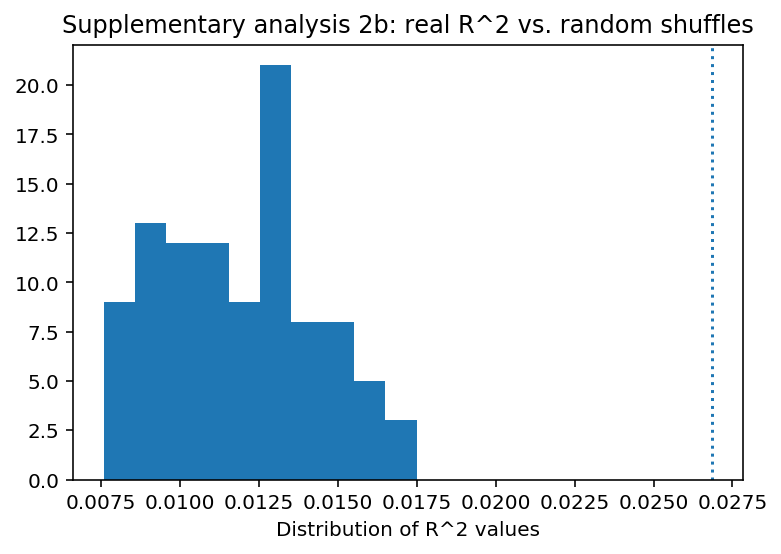

In [88]:
plt.hist(shuffled_rsquares)
plt.axvline(x=true_rsquare, linestyle="dotted")
plt.xlabel("Distribution of R^2 values")
plt.title("Supplementary analysis 2b: real R^2 vs. random shuffles")